# MYGRASP test

test my implementation of grasp running the construction phase with different distances, $\sigma$ (for the gaussian kernel) and $\alpha$ (greedyness)


In [8]:
import numpy as np
import random
import scipy as sp
import sys
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist, squareform

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import grasp, scores
%autoreload 2

In [10]:
input_data = np.loadtxt("candidates_2columns.dat")
input_data.shape

(10000, 2)

In [11]:
grasp_out = np.loadtxt("solution_v_32.txt")
grasp_index = open("solution_i_32_32.txt", "r")
grasp_sol = np.array([int(i) for i in grasp_index.readlines()[3:]])
grasp_out.shape, grasp_sol.shape

((32, 2), (32,))

In [12]:
## Test score

In [13]:
D = squareform(pdist(input_data))

In [14]:
labels = (9480, 9842, 8367, 8721, 5036, 6009, 4879, 35, 4272, 6626, 3232, 256, 1705, 9182, 9333, 1729)

In [15]:
scores.oldfrscore(labels, D=D, N_loc=6)

0.35654873829677974

In [16]:
myscore = scores.frscore(input_data, inverse=False)

In [17]:
myscore(labels)

0.35654873829677974

## Test GRASP 1
### (small data set)

In [18]:
X = input_data[::10]
print(X.shape[0], X.shape[0]*0.0160)

1000 16.0


In [19]:
myscore = scores.frscore(X)

In [32]:
mygrasp = grasp.simpleGRASP(seed=123456, score=myscore, do_local=True, n_iter=10, verbose=2, alpha=0.1,\
                N_sel=0.0160)
cost, mysol, mycoords =mygrasp.run(X)

-- Starting GRASP with  16  points
building 0 0.9162449062906505
local optimization 0 0.9160327817101116
--- iter, best_score, opt_score, build_score  0 0.9160327817101116 0.9160327817101116 0.9162449062906505
building 1 0.919585216479425
local optimization 1 0.919585216479425
building 2 0.8487407059812814
local optimization 2 0.8487407059812814
--- iter, best_score, opt_score, build_score  2 0.8487407059812814 0.8487407059812814 0.8487407059812814
building 3 0.8614962763479939
local optimization 3 0.8614962763479939
building 4 0.9467921381067756
local optimization 4 0.9441009272209491
building 5 0.8687557567688333
local optimization 5 0.8687557567688333
building 6 0.8739789466369569
local optimization 6 0.8739789466369569
building 7 0.8788155941086081
local optimization 7 0.8773828834521034
building 8 0.934431400877805
local optimization 8 0.934431400877805
building 9 0.8750782476707586
local optimization 9 0.8672918076283237


In [33]:
mysol, len(set(mysol))

([583, 497, 10, 850, 610, 490, 910, 811, 611, 460, 730, 830, 800, 0, 380, 710],
 16)

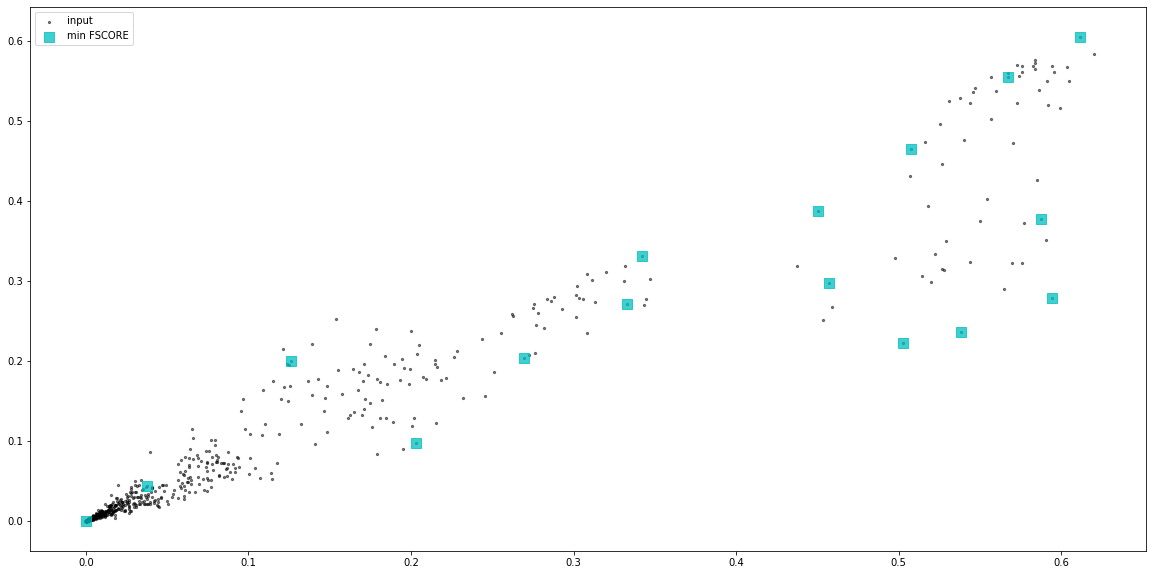

In [34]:
plt.figure(figsize=(20,10))
x = X[:,0]
y = X[:,1]
plt.scatter(x, y, marker="o", s=5, c='k', label="input", alpha=0.5)
plt.scatter(x[mysol], y[mysol], label="min FSCORE", marker='s',c='c', s=100,alpha=0.75)
plt.legend()

## Test GRASP 2
### complete data set

In [35]:
bigscore = scores.frscore(input_data)

In [37]:
mygrasp = grasp.simpleGRASP(seed=123456, score=bigscore, do_local=True, n_iter=10, verbose=2, alpha=0.1,\
                N_sel=0.00320)
cost, mysol, mycoords =mygrasp.run(input_data)

-- Starting GRASP with  32  points
building 0 0.803540743653287
local optimization 0 0.8033459321219597
--- iter, best_score, opt_score, build_score  0 0.8033459321219597 0.8033459321219597 0.803540743653287
building 1 0.7899324742992733
local optimization 1 0.7899324742992733
--- iter, best_score, opt_score, build_score  1 0.7899324742992733 0.7899324742992733 0.7899324742992733
building 2 0.7883078843012857
local optimization 2 0.7883078843012857
--- iter, best_score, opt_score, build_score  2 0.7883078843012857 0.7883078843012857 0.7883078843012857
building 3 0.8097475698671794
local optimization 3 0.8097028807675162
building 4 0.8093844250800207
local optimization 4 0.8077443624586408
building 5 0.8098555705868165
local optimization 5 0.8096122740818027
building 6 0.7630844641463943
local optimization 6 0.7630844641463943
--- iter, best_score, opt_score, build_score  6 0.7630844641463943 0.7630844641463943 0.7630844641463943
building 7 0.7896509622216297
local optimization 7 0.7896

In [38]:
len(set(mysol))

32

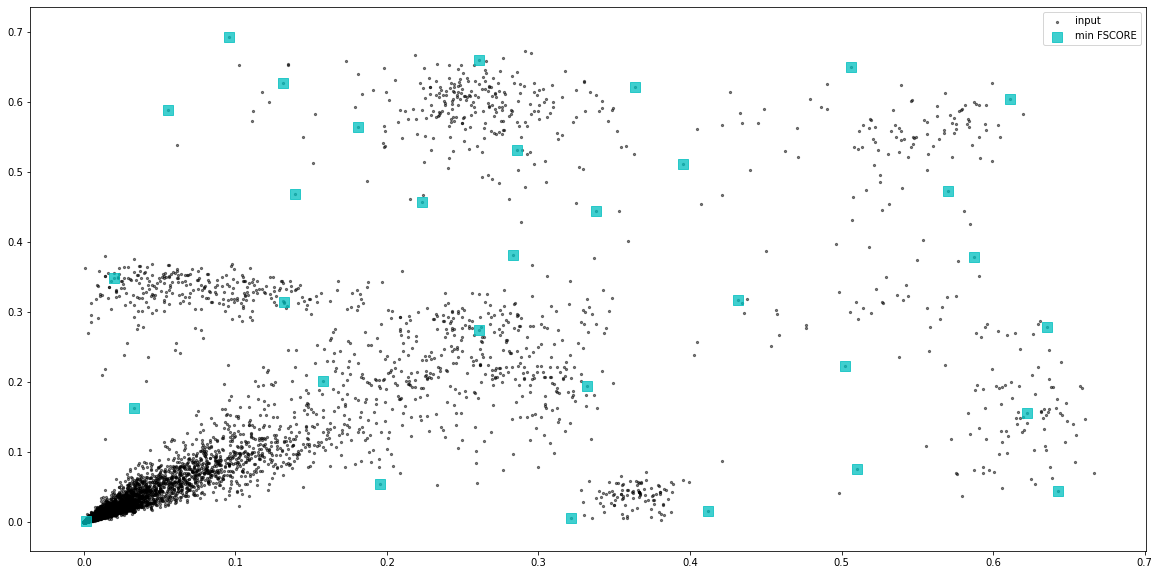

In [39]:
plt.figure(figsize=(20,10))
x = input_data[:,0]
y = input_data[:,1]
plt.scatter(x, y, marker="o", s=5, c='k', label="input", alpha=0.5)
plt.scatter(x[mysol], y[mysol], label="min FSCORE", marker='s',c='c', s=100,alpha=0.75)
plt.legend()